In [205]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image

In [340]:
# Define the path to the training images directory
# Image folder does not have Classes, we will have to make custom dataset

train_dataset_path = './documents/datasets/bloodCells/Complete-Blood-Cell-Count-Dataset-master/training/Images'

In [271]:
# List all the image filenames in the Images directory

training_image_filenames = [filename for filename in os.listdir(train_dataset_path) if filename.endswith('.jpg')]

In [273]:
# Create a list of (image_path, label) tuples, where label is 0 (since there's only one class)

training_data = [(os.path.join(train_dataset_path, filename), 0) for filename in training_image_filenames]

In [308]:
# Create a custom dataset using the list of (image_path, label) tuples

class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image_path, label = self.data[index]
        image = Image.open(image_path).convert('RGB')  # Open the image and convert to RGB
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [321]:
# Define transformations for the images
# Normalization -> image = (image - mean) / std

#mean = [0.7365, 0.6955, 0.7137]
#std= [0.0598, 0.1014, 0.0760]

train_transforms = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

test_transforms = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [356]:
# Create an instance of the custom dataset

train_custom_dataset = CustomImageDataset(training_data, transform = train_transforms)

In [357]:
# Create a DataLoader to load the dataset in batches

batch_size = 32
trainTest_loader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch_size, shuffle=False)

In [358]:
# Iterate through batches in the DataLoader
# Process each batch of images and labels (perform training/validation, etc.)

for images, labels in trainTest_loader:
    print(f"Batch Size: {images.size(0)}")

Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 32
Batch Size: 12


In [359]:
get_mean_and_std(trainTest_loader)

(tensor([-0.4536, -0.2535, -0.3380]), tensor([2.4371, 1.5966, 1.9733]))

In [326]:
def get_mean_and_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0
    for images, labels in train_loader:
        image_count_in_a_batch = images.size(0)
        images = images.view(image_count_in_a_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_a_batch
        
    mean /= total_images_count
    std /= total_images_count
    
    return mean, std

In [327]:
# Define the path to the test images directory

test_dataset_path = './documents/datasets/bloodCells/Complete-Blood-Cell-Count-Dataset-master/testing/Images'

In [328]:
# List all the image filenames in the Images directory

test_image_filenames = [filename for filename in os.listdir(test_dataset_path) if filename.endswith('.jpg')]

In [329]:
# Create a list of (image_path, label) tuples, where label is 0 (since there's only one class)

test_data = [(os.path.join(test_dataset_path, filename), 0) for filename in test_image_filenames]

In [353]:
# Create a DataLoader to load the dataset in batches

batch_size = 32
test_loader = torch.utils.data.DataLoader(test_custom_dataset, batch_size=batch_size, shuffle=False)

In [333]:
def show_transformed_images(dataset):
    loader = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = torchvision.utils.make_grid(images, nrow = 3)
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print('labels: ', labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


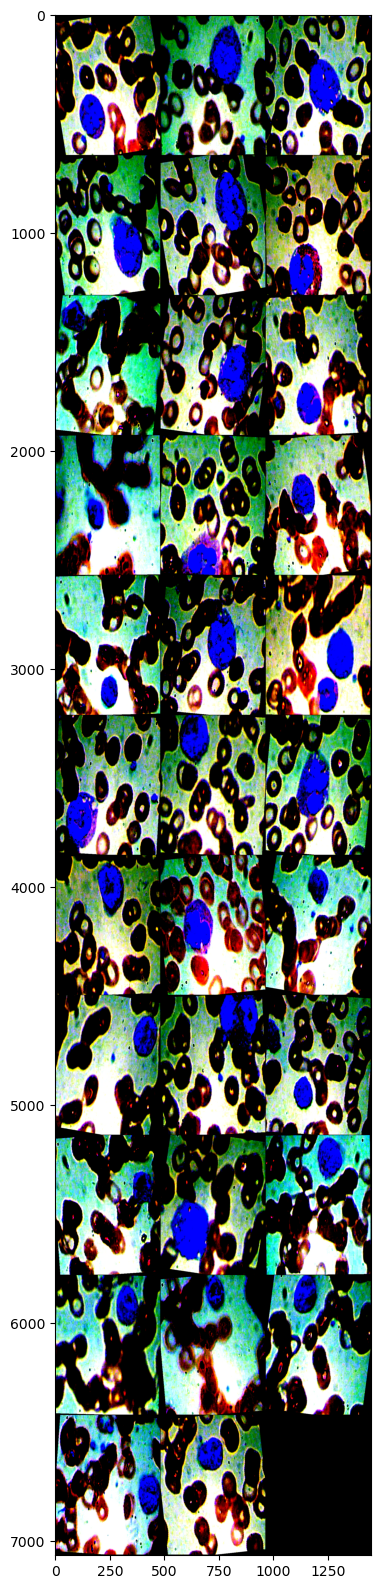

In [334]:
show_transformed_images(train_custom_dataset)

In [354]:
# Mini-Batch Gradient Descent

train_loader = torch.utils.data.DataLoader(train_custom_dataset, batch_size = 32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_custom_dataset, batch_size = 32, shuffle=False)

In [350]:
def set_device():
    if torch.cuda.is_available() and torch.version.hip:
        dev = "cuda"
    elif torch.cuda.is_available() and torch.version.cuda:
        dev = "cuda:0"
    else:
        dev = "cpu"
    return torch.device(dev)

In [342]:
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs):

SyntaxError: incomplete input (297394427.py, line 1)

In [343]:
def evaluate_model_on_test_set(mode, test_loader):

SyntaxError: incomplete input (3665526415.py, line 1)